In [169]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats

In [116]:
import warnings
import types
warnings.simplefilter(action='ignore', category=FutureWarning)

In [117]:
autor = pd.read_csv('autores.csv',delimiter=';')
docente = pd.read_csv('docente.csv',delimiter=';')
publ = pd.read_csv('publicacao.csv',delimiter=';')
qualis = pd.read_csv('qualis_score.csv',delimiter=';')

# Carolina tem que ficar no TOP 5
### Heitor não

In [118]:
autor

,id_publicacao,id_autor
0,164,10
1,165,3
2,77,9
3,121,1
4,144,6
...,...,...
256,29,5
257,156,5
258,155,4
259,171,7


In [187]:
# Eles não tem publicacao conjunta
asd = autor[autor['id_autor'].isin([3,8])].groupby('id_publicacao').count()
asd[asd['id_autor'] > 1]

,id_autor
id_publicacao,


In [199]:
#Quantas publicações conjuntas cada um tem
pubs1 = autor[autor['id_autor'].isin([3,8])]['id_publicacao']
asd = autor.loc[autor['id_publicacao'].isin(pubs1)]
asd = asd.groupby('id_publicacao').count()
asd[asd['id_autor'] > 1]

,id_autor
id_publicacao,
29,3
30,3
35,3
42,3
45,3
46,3
54,3
60,3
62,3


In [119]:
docente

,id,nome,idade_doutorado
0,1,Alex,7
1,2,Beto,10
2,3,Carolina,5
3,4,Debora,10
4,5,Eric,7
5,6,Fabiana,7
6,7,Gabriela,12
7,8,Heitor,11
8,9,Iara,9
9,10,Juca,11


In [120]:
publ

,id,tipo,qualis,ano
0,1,E,B1,2020
1,2,P,B1,2022
2,3,E,A3,2023
3,4,E,B4,2021
4,5,P,A4,2023
...,...,...,...,...
184,185,P,A1,2020
185,186,E,A1,2023
186,187,E,A4,2023
187,188,E,B4,2021


In [121]:
qualis

,qualis,tipo,score,restrito
0,A1,E,1.00000,True
1,A2,E,0.87500,True
2,A3,E,0.75000,True
3,A4,E,0.62500,True
4,B1,E,0.50000,False
5,B2,E,0.20000,False
6,B3,E,0.10000,False
7,B4,E,0.05000,False
8,A1,P,1.25000,True
9,A2,P,1.09375,True


In [122]:
publ.merge(qualis,left_on=['qualis','tipo'],right_on=['qualis','tipo'],how='inner')

,id,tipo,qualis,ano,score,restrito
0,1,E,B1,2020,0.50000,False
1,2,P,B1,2022,0.62500,False
2,3,E,A3,2023,0.75000,True
3,4,E,B4,2021,0.05000,False
4,5,P,A4,2023,0.78125,True
...,...,...,...,...,...,...
184,185,P,A1,2020,1.25000,True
185,186,E,A1,2023,1.00000,True
186,187,E,A4,2023,0.62500,True
187,188,E,B4,2021,0.05000,False


In [123]:
autor.merge(docente,left_on='id_autor',right_on='id',how='inner').drop('id',axis=1)

,id_publicacao,id_autor,nome,idade_doutorado
0,164,10,Juca,11
1,165,3,Carolina,5
2,77,9,Iara,9
3,121,1,Alex,7
4,144,6,Fabiana,7
...,...,...,...,...
256,29,5,Eric,7
257,156,5,Eric,7
258,155,4,Debora,10
259,171,7,Gabriela,12


In [124]:
publ.merge(autor,left_on='id',right_on='id_publicacao',how='inner').drop('id',axis=1)

,tipo,qualis,ano,id_publicacao,id_autor
0,E,B1,2020,1,4
1,P,B1,2022,2,1
2,P,B1,2022,2,5
3,E,A3,2023,3,9
4,E,B4,2021,4,6
...,...,...,...,...,...
256,P,A1,2020,185,3
257,E,A1,2023,186,3
258,E,A4,2023,187,4
259,E,B4,2021,188,6


In [125]:
all_merge = publ.merge(
    autor.merge(
        docente
        ,left_on='id_autor',right_on='id',how='left').drop(['id','id_autor'],axis=1)
    ,left_on='id',right_on='id_publicacao',how='left').drop('id',axis=1)

all_merge = all_merge.merge(qualis,left_on=['qualis','tipo'],right_on=['qualis','tipo'],how='inner')

In [126]:
#all_merge = all_merge[(all_merge['nome'] == 'Heitor') | (all_merge['nome'] == 'Carolina')]

In [127]:
all_merge

,tipo,qualis,ano,id_publicacao,nome,idade_doutorado,score,restrito
0,E,B1,2020,1,Debora,10,0.500,False
1,P,B1,2022,2,Alex,7,0.625,False
2,P,B1,2022,2,Eric,7,0.625,False
3,E,A3,2023,3,Iara,9,0.750,True
4,E,B4,2021,4,Fabiana,7,0.050,False
...,...,...,...,...,...,...,...,...
256,P,A1,2020,185,Carolina,5,1.250,True
257,E,A1,2023,186,Carolina,5,1.000,True
258,E,A4,2023,187,Debora,10,0.625,True
259,E,B4,2021,188,Fabiana,7,0.050,False


<div>
<img src="image.png" width="800"/>
</div>


,ano,idade_doutorado,score
nome,,,
Gabriela,2021,12,0.62500
Debora,10109,50,3.71875
Beto,10108,50,5.46875
Katiane,16166,120,6.21875
Juca,22240,121,9.59375
Heitor,30327,165,13.34375
Carolina,30327,75,15.40625
Fabiana,46500,161,21.34375
Alex,50540,175,22.25000


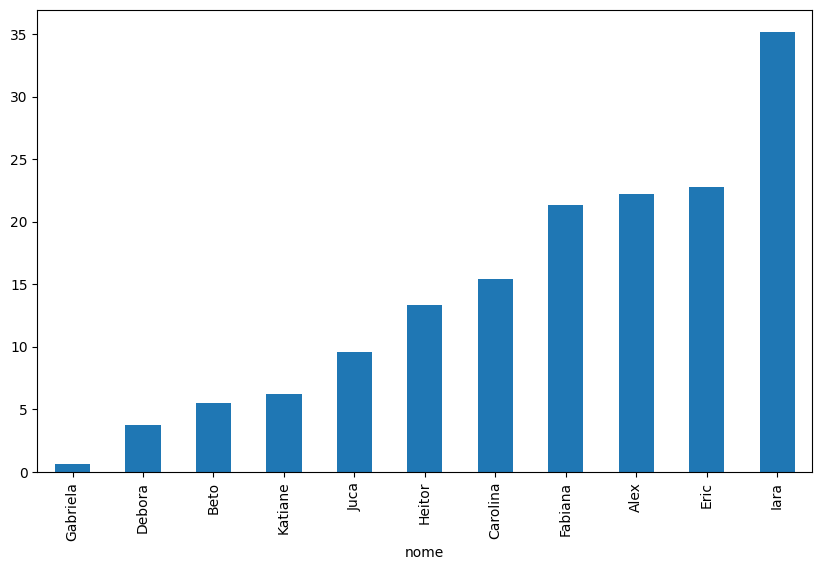

In [149]:
# Soma dos scores pra cada autor ( somente )
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
df11 = all_merge[all_merge['qualis'].isin(['A1','A2','A3','A4'])].groupby(['nome']).sum().sort_values(by='score',ascending=True)
df11['score'].plot(kind='bar')
df11[['ano','idade_doutorado','score']]
#ax1.plot(df11)
#.plot(kind='barh',cmap=plt.get_cmap('Spectral'),edgecolor=None)
#plt.legend()

### Argumento deles: "Nosso score é maior"
### Nosso Argumento: "O score é inflado de publicações de baixo impacto, ao filtrar por alto impacto, vemos que carolina dá o gap"

In [129]:
#quantas publicacoes p/ prof
all_merge.groupby('nome').size().sort_values()

nome
Gabriela     1
Beto         5
Debora       9
Katiane     10
Juca        15
Carolina    17
Heitor      23
Fabiana     35
Alex        41
Eric        46
Iara        59
dtype: int64

In [130]:
all_merge.groupby('nome').groups.__len__()

11

### Valor médio de qualis
### vai apontar a consistencia do autor em publicações

In [182]:
# Média + STD de todas as publicacoes
all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) ].groupby('nome').describe()

ano                                                                 \
         count         mean       std     min     25%     50%     75%     max   
nome                                                                            
Carolina  17.0  2021.882353  1.268974  2020.0  2021.0  2022.0  2023.0  2023.0   
Heitor    23.0  2021.478261  1.162660  2020.0  2020.5  2021.0  2022.5  2023.0   

         id_publicacao              ... idade_doutorado       score            \
                 count        mean  ...             75%   max count      mean   
nome                                ...                                         
Carolina          17.0  106.117647  ...             5.0   5.0  17.0  0.945956   
Heitor            23.0   96.739130  ...            11.0  11.0  23.0  0.720924   

                                                   
               std   min    25%   50%   75%   max  
nome                                               
Carolina  0.314672  0.05  0.750  1.00  1.25  1.25  
Heitor    0.323036  0.05  0.625  0.75  0.75  1.25  

[2 rows x 32 columns]

In [181]:
# Média + STD de todas as publicacoes Alto impacto
all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) & (all_merge['qualis'].isin(['A1','A2','A3','A4']))].groupby('nome').describe()

ano                                                            \
         count    mean       std     min     25%     50%     75%     max   
nome                                                                       
Carolina  15.0  2021.8  1.320173  2020.0  2020.5  2022.0  2023.0  2023.0   
Heitor    15.0  2021.8  1.207122  2020.0  2021.0  2022.0  2023.0  2023.0   

         id_publicacao              ... idade_doutorado       score            \
                 count        mean  ...             75%   max count      mean   
nome                                ...                                         
Carolina          15.0  105.400000  ...             5.0   5.0  15.0  1.027083   
Heitor            15.0   96.066667  ...            11.0  11.0  15.0  0.889583   

                                                          
               std    min      25%   50%       75%   max  
nome                                                      
Carolina  0.203508  0.625  0.96875  1.00  1.250000  1.25  
Heitor    0.213543  0.750  0.75000  0.75  1.046875  1.25  

[2 rows x 32 columns]

In [178]:
# Número de publicacoes A1-A4 dos 2
all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) & (all_merge['qualis'].isin(['A1','A2','A3','A4']))].groupby('nome').count()

,tipo,qualis,ano,id_publicacao,idade_doutorado,score,restrito
nome,,,,,,,
Carolina,15,15,15,15,15,15,15
Heitor,15,15,15,15,15,15,15


<Axes: xlabel='score'>

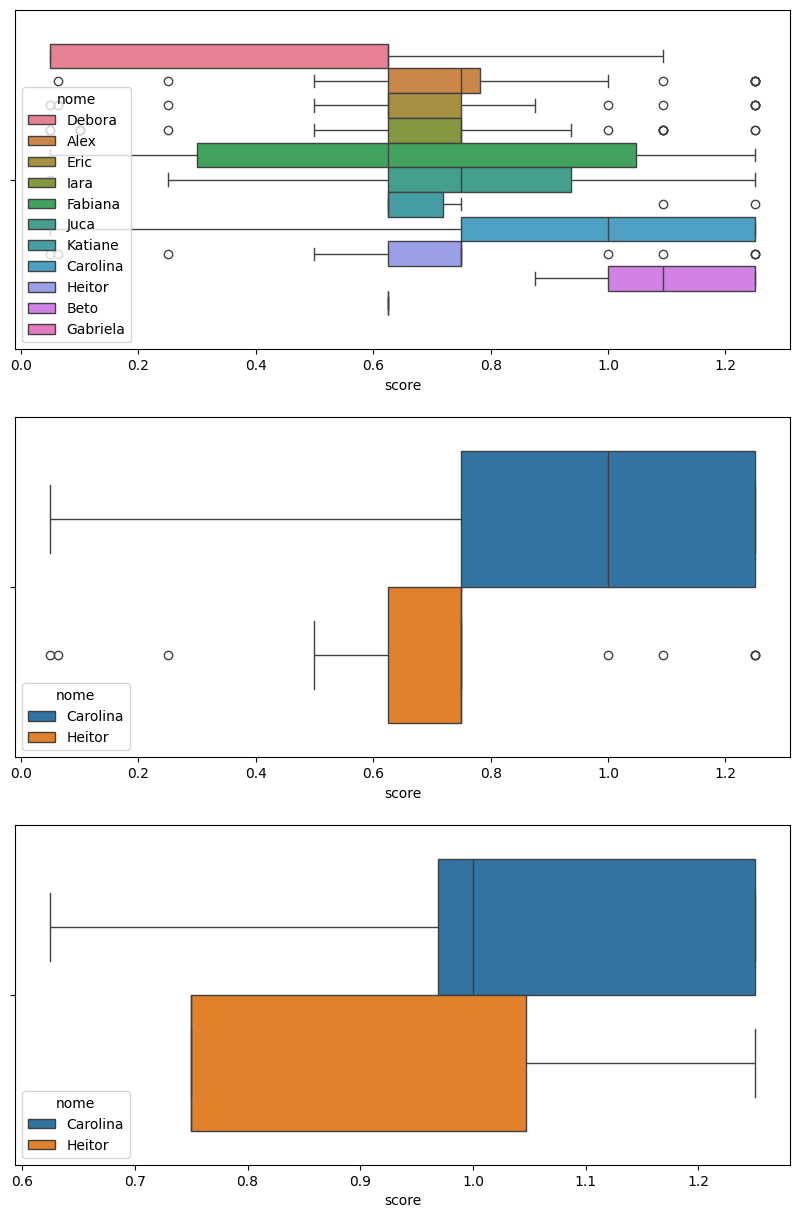

In [167]:
#Qual a distribuição das publicações com base no score total
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,15))
sns.boxplot(all_merge,x='score',hue='nome',ax=ax1)
sns.boxplot(all_merge[all_merge['nome'].isin(['Carolina','Heitor'])],x='score',hue='nome',ax=ax2)
sns.boxplot(all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) & (all_merge['qualis'].isin(['A1','A2','A3','A4']))],x='score',hue='nome',ax=ax3)
#all_merge[all_merge['qualis'].isin(['A1','A2','A3','A4'])].groupby('nome').mean()['score']


### Pensem em métricas (total, top 5. top 10, melhor de cada ano), considerem o impacto de publicações conjuntas

---

## Garbage

Alex
41.0
nome
Alex    41.0
dtype: float64
Beto
5.0
nome
Beto    5.0
dtype: float64


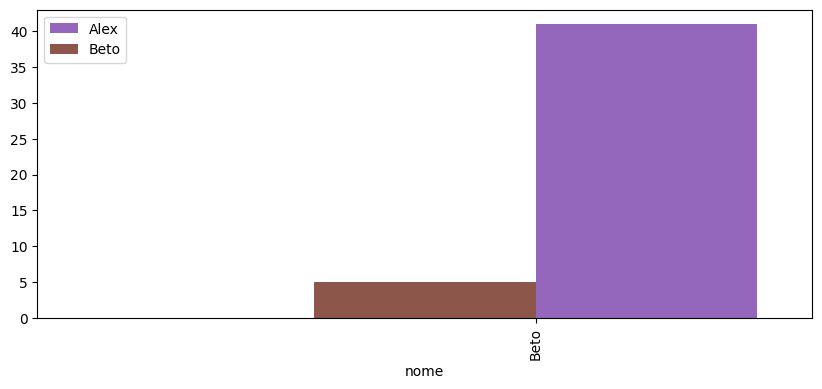

In [131]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
for i,k in zip(all_merge.groupby('nome').groups,[0,1]):
    print(i)
    j = all_merge[all_merge.nome==i]
    rs1 = j.groupby('nome').count().sum(axis=1) / j.groupby('nome').count().columns.__len__()
    print(j.count().mean())
    print(rs1)
    rs1.plot(kind='bar',ax=ax,width=0.2,position=k,color=plt.cm.tab10(k+4),label=i)
    #all_merge[all_merge.nome==i].count().hist(column='score',sharex=True,grid=False,sharey=True,ax=ax,legend=i)
plt.legend()

Alex
41.0
score
0.06250     1.0
0.25000     1.0
0.50000     6.0
0.62500    11.0
0.75000    11.0
0.78125     1.0
1.00000     4.0
1.09375     1.0
1.25000     5.0
dtype: float64
Beto
5.0
score
0.87500    1.0
1.00000    1.0
1.09375    1.0
1.25000    2.0
dtype: float64


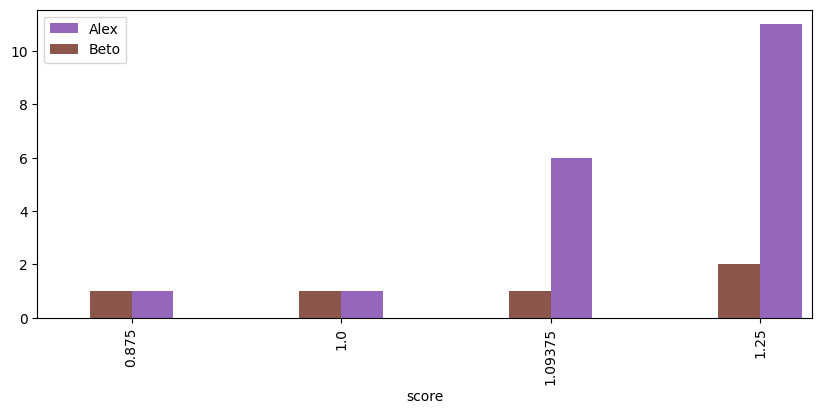

In [132]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
for i,k in zip(all_merge.groupby('nome').groups,[0,1]):
    print(i)
    j = all_merge[all_merge.nome==i]
    rs1 = j.groupby('score').count().sum(axis=1) / j.groupby('score').count().columns.__len__()
    print(j.count().mean())
    print(rs1)
    rs1.plot(kind='bar',ax=ax,width=0.2,position=k,color=plt.cm.tab10(k+4),label=i)
    #all_merge[all_merge.nome==i].count().hist(column='score',sharex=True,grid=False,sharey=True,ax=ax,legend=i)
plt.legend()